# Introduction
The sinking of titanic is one of the most notorious shipwrecks in the history. In 1912,during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 of out 2224 passengers and crew.

<font color="red">
Content:

1. [Load and Check Data](#1)
2. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
3. [Basic Data Analysis](#6)
4. [Outlier Detection](#7)
5. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
6. [Visualization](#11)
    * [Correlation Between SibSp--Parch--Age--Fare--Survived](#12)
    * [SibSp--Survived](#13)
    * [Parch--Survived](#14)
    * [Pclass--Survived](#15)
    * [Age--Survived](#16)
    * [Pclass--Survived--Age](#17)
    * [Embarked--Sex--Pclass--Survived](#18)
    * [Embarked--Sex--Fare--Survived](#19)
    * [Fill Missing: Age Feature](#20)
7. [Feature Engineering](#21)
    * [Name--Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
8. [Modeling](#29)
    * [Train Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning--Grid Search--Cross Validation](#32)
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id="1"></a><br>
# Load and Check

In [2]:
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")
test_passengerId=test_df["PassengerId"]

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="2"></a><br>
# Variable Description
1. PassengerId: uniqiue id number to each passenger
2. Survived: 
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked
     

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare and age
* int64(5): PassengerId, sibsp, parch, pclasss and survived
* object(5) Cabin, embarked, ticket, name and sex

<a id="3"></a><br>
# Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Age, PassengerId and Fare


<a id="4"></a><br>
## Categorical Variable

In [7]:
def bar_plot(variable):
    """
       input: variable ex:"Sex"
       output: bar plot & value count
    """
    # get feature
    var=train_df[variable]
    # count number of categorical variable(value/sample)
    varValue=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} \n {}".format(variable,varValue))

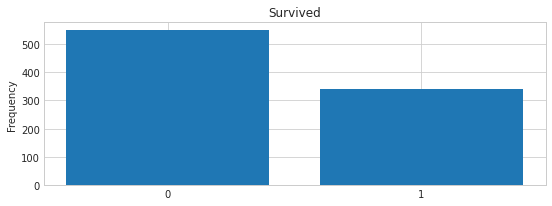

Survived 
 0    549
1    342
Name: Survived, dtype: int64


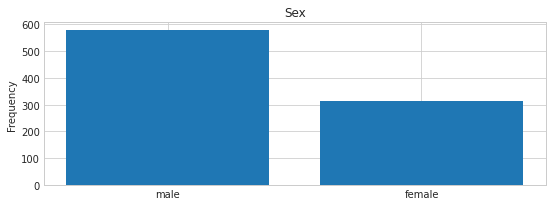

Sex 
 male      577
female    314
Name: Sex, dtype: int64


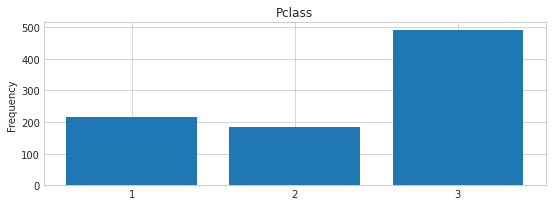

Pclass 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


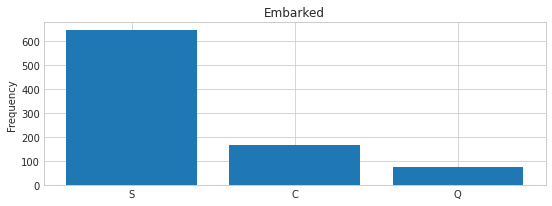

Embarked 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


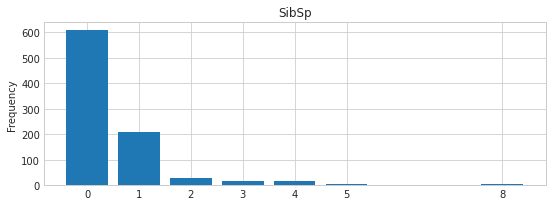

SibSp 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


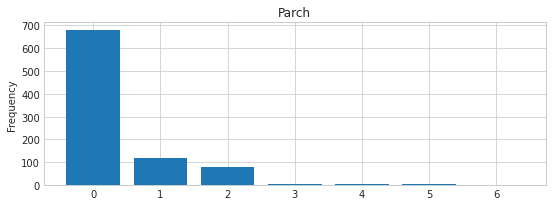

Parch 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
category1=["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [9]:
category2=["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



<a id="5"></a><br>
## Numerical Variable

In [10]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable],bins=50) # default bins=10
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
    

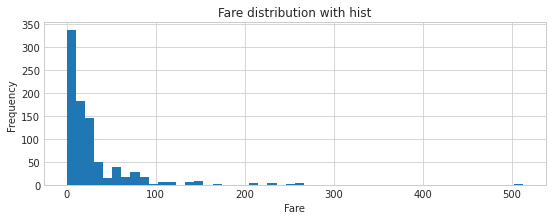

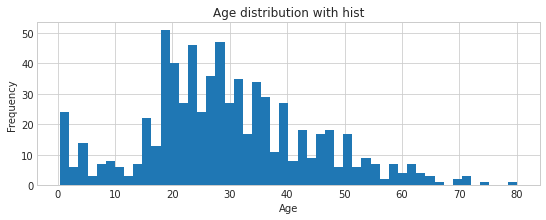

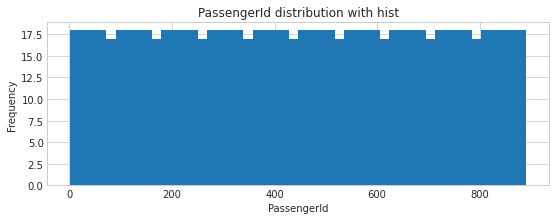

In [11]:
numeric_var=["Fare","Age","PassengerId"]
for i in numeric_var:
    plot_hist(i)

<a id="6"></a><br>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived
* Fare - Survived
* Age - Survived

In [12]:
# Plass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [15]:
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [16]:
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_df[["Age","Survived"]].groupby(["Survived"],as_index=False).mean().sort_values(by="Survived",ascending=False)


,Survived,Age
1,1,28.343690
0,0,30.626179


In [18]:
train_df[["Fare","Survived"]].groupby(["Survived"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Survived,Fare
1,1,48.395408
0,0,22.117887


<a id="7"></a><br>
# Outlier Detection

In [19]:
def detect_outliers(df,features):
    outlier_indices=[]
    
    for i in features:
        #1st quartile
        q1=np.percentile(df[i],25)
        
        #3st quartile
        q3=np.percentile(df[i],75)
        
        #3st quartile
        iqr=q3-q1
        
        #outlier step
        outlier_step=iqr*1.5
        
        #detect outlier and their indeces
        outlier_list_col=df[(df[i]<q1 - outlier_step) | (df[i]>q3 + outlier_step)].index
        
        #store indeces
        outlier_indices.extend(outlier_list_col)
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>2)
    
    return multiple_outliers

In [20]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [21]:
#drop outliers
train_df=train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)


<a id="8"></a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [22]:
train_df_len=len(train_df)
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="9"></a><br>
## Find Missing Value

In [24]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [25]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id="10"></a><br>
## Fill Missing Value
* Embarked has 2 missing value
* Fare has only 1

In [26]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


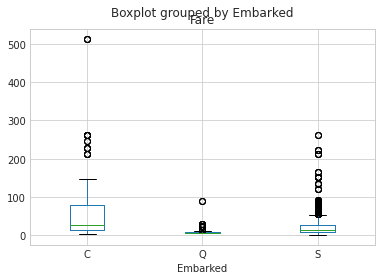

In [27]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [28]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [29]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [30]:
train_df["Fare"]=train_df["Fare"].fillna(train_df[train_df["Pclass"]==3]["Fare"].mean())
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id="11"></a><br>
# Visualization

<a id="12"></a><br>
## Correlation Between SibSp--Parch--Age--Fare--Survived

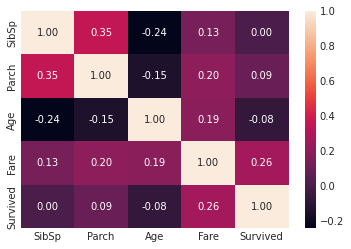

In [31]:
list1=["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(),annot=True,fmt=".2f")
plt.show()

Fare feature seems to have corralation with survived feature (0.26).

<a id="13"></a><br>
## SibSp--Survived

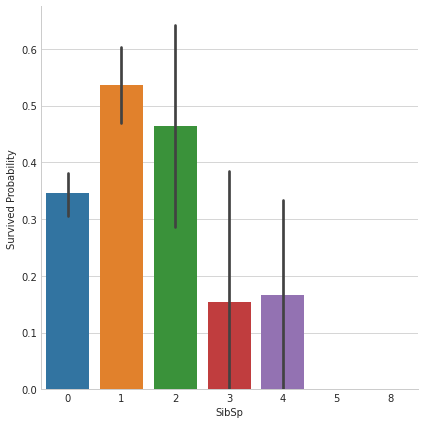

In [32]:
g=sns.factorplot(x="SibSp",y="Survived",data=train_df,kind="bar",size=6)
g.set_ylabels("Survived Probability")
plt.show()

* Having a lot of SibSp have less chance to survive.
* if SibSp == 0 or 1 or 2 , passanger has more chance to survive
* We can consider a new feature describing these categories.

<a id="14"></a><br>
## Parch--Survived

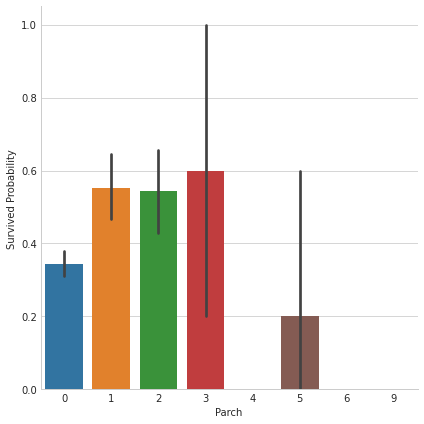

In [33]:
g = sns.factorplot(x="Parch",y="Survived",data=train_df,kind="bar",size=6)
g.set_ylabels("Survived Probability")
plt.show()

* SibSp and Parch can be used for new feature extraction with th=3
* Small families have more chance to survive.
* There is a std in survival of passenger with parch = 3

<a id="15"></a><br>
## Pclass--Survived

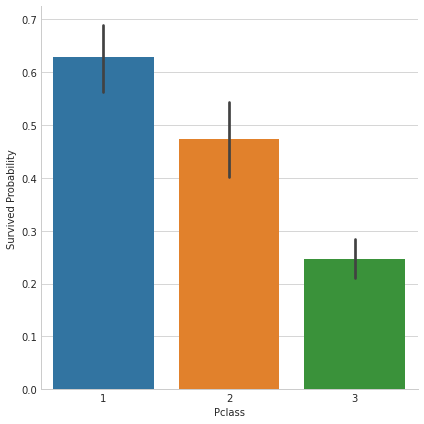

In [34]:
g=sns.factorplot(x="Pclass",y="Survived",data=train_df,size=6,kind="bar")
g.set_ylabels("Survived Probability")
plt.show()

<a id="16"></a><br>
## Age--Survived

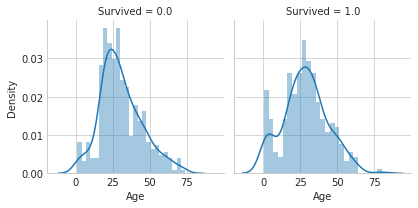

In [35]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(sns.distplot,"Age",bins=25)
plt.show()

* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive
* most passengers are in 13-35 age range 
* use age feature in training 
* use age distribution for missing value of age

<a id="17"></a><br>
## Pclass--Survived--Age

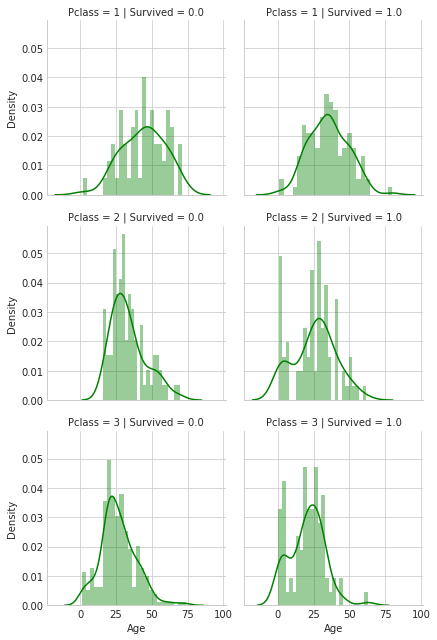

In [36]:
g=sns.FacetGrid(data=train_df,col="Survived",row="Pclass",size=3)
g.map(sns.distplot,"Age",bins=25,color="green")
g.add_legend()
plt.show()

* Pclass is important feature for model training 

<a id="18"></a><br>
## Embarked--Sex--Pclass--Survived

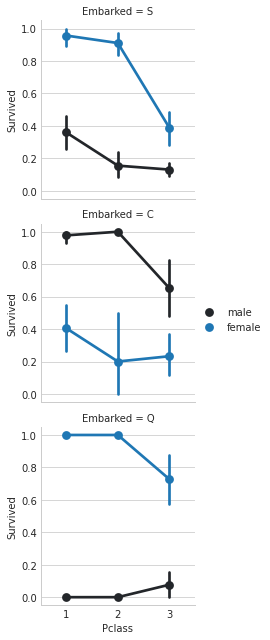

In [37]:
g=sns.FacetGrid(data=train_df,row="Embarked",size=3)
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* Males have better survival rate in pclass 3 in C.
* Embarked and sex will be used in training.

<a id="19"></a><br>
## Embarked--Sex--Fare--Survived

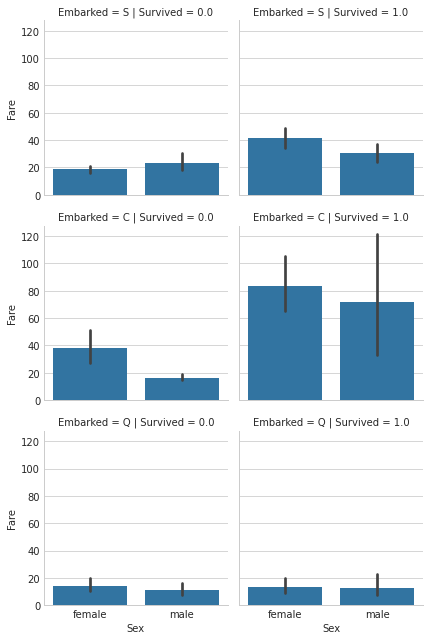

In [38]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

* Passengers who pay higher fare have better survival. Fare can be used as categorical for training.


<a id="20"></a><br>
## Fill Missing: Age Feature

In [39]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


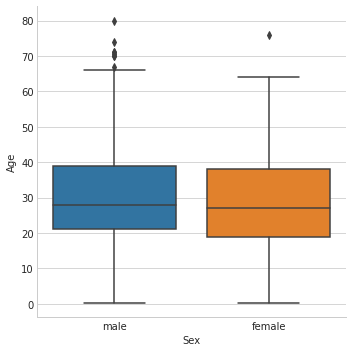

In [40]:
sns.factorplot(x="Sex",y="Age",data=train_df,kind="box")
plt.show()

Sex is not informatic for age prediction, age distribution seems to be same.

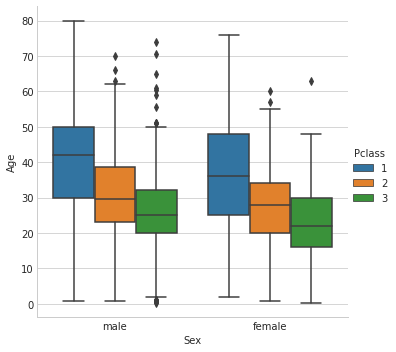

In [41]:
sns.factorplot(x="Sex",y="Age",hue="Pclass",data=train_df,kind="box")
plt.show()

1st class passengers are older than 2nd and 2nd older than 3rd class.


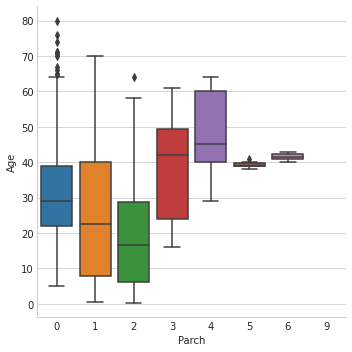

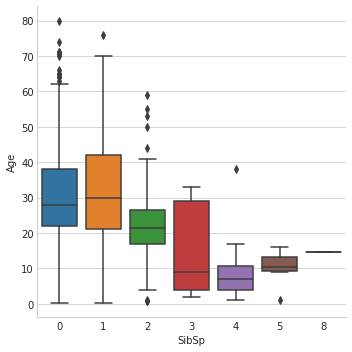

In [42]:
sns.factorplot(x="Parch",y="Age",data=train_df,kind="box")
sns.factorplot(x="SibSp",y="Age",data=train_df,kind="box")
plt.show()

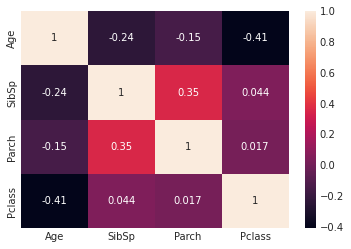

In [43]:
#train_df["Sex"]=[1 if i=="male" else 0 for i in train_df["Sex"]]
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot=True)
plt.show()

Age is not correlated with sex but it is correlated with parch,sibsp and pclass

In [44]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [45]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id="21"></a><br>
# Feature Engineering


<a id="22"></a><br>
## Name--Title

In [46]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [47]:
name=train_df["Name"]
train_df["title"]=[i.split(".")[0].split(",")[-1].strip() for i in name]

In [48]:
train_df["title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: title, dtype: object

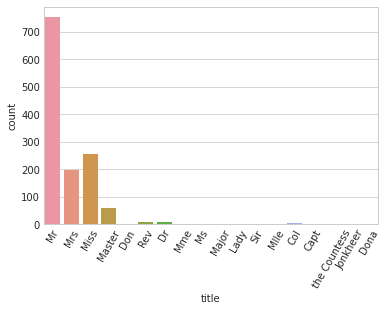

In [49]:
sns.countplot(x="title",data=train_df)
plt.xticks(rotation=60)
plt.show()

In [50]:
# convert to categorical
train_df["title"]=train_df["title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")

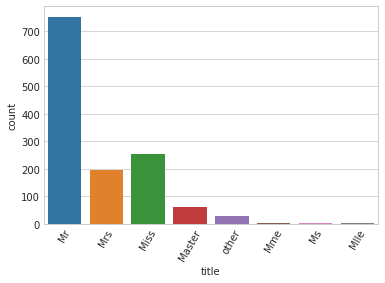

In [51]:
sns.countplot(x="title",data=train_df)
plt.xticks(rotation=60)
plt.show()

In [52]:
train_df["title"]=[0 if i=="Master" else 1 if i=="Miss" or i =="Ms" or i=="Mlle" or i=="Mrs" else 2 if i=="Mr" else 3 for i in train_df["title"]]
train_df["title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: title, dtype: int64

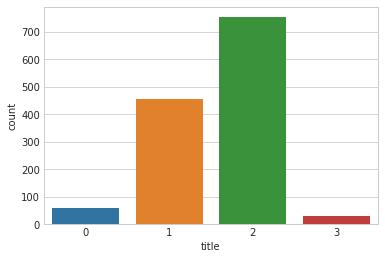

In [53]:
sns.countplot(x="title",data=train_df)
plt.show()

[]

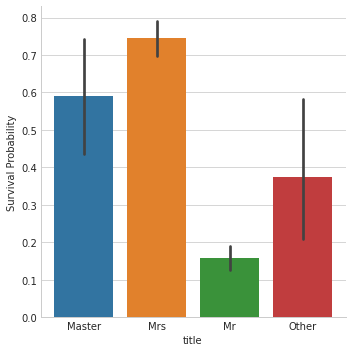

In [54]:
g=sns.factorplot(x="title",y="Survived",data=train_df,kind="bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.plot()

In [55]:
train_df.drop(labels=["Name"],axis=1,inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [56]:
train_df=pd.get_dummies(train_df,columns=["title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_0,title_1,title_2,title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


<a id="23"></a><br>
## Family Size

In [57]:
train_df["Fsize"]=train_df["SibSp"]+train_df["Parch"]+1
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_0,title_1,title_2,title_3,Fsize
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


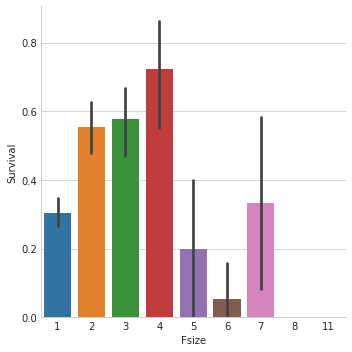

In [58]:
g=sns.factorplot(x="Fsize",y="Survived",data=train_df,kind="bar")
g.set_ylabels("Survival")
plt.show()

In [59]:
train_df["family_size"]=[1 if i<5 else 0 for i in train_df["Fsize"]]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_0,title_1,title_2,title_3,Fsize,family_size
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1


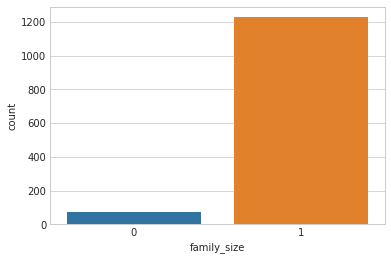

In [60]:
sns.countplot(x="family_size",data=train_df)
plt.show()

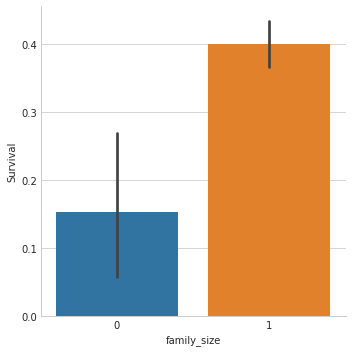

In [61]:
g=sns.factorplot(x="family_size",y="Survived",data=train_df,kind="bar")
g.set_ylabels("Survival")
plt.show()

Small families have more chance to survive than big families.

In [62]:
train_df=pd.get_dummies(train_df,columns=["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_0,title_1,title_2,title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


<a id="24"></a><br>
## Embarked

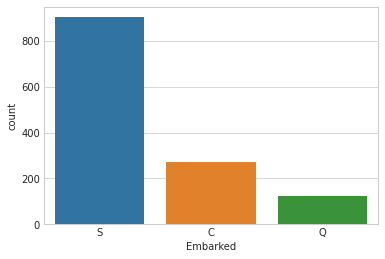

In [63]:
sns.countplot(x="Embarked",data=train_df)
plt.show()

In [64]:
train_df=pd.get_dummies(train_df,columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,title_0,title_1,title_2,title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


<a id="25"></a><br>
## Ticket

In [65]:
train_df["Ticket"].head(25)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
Name: Ticket, dtype: object

In [66]:
tickets=[]
for i in list(train_df["Ticket"]):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"]=tickets

In [67]:
train_df["Ticket"].head()

0        A5
1        PC
2    STONO2
3         x
4         x
Name: Ticket, dtype: object

In [68]:
train_df=pd.get_dummies(train_df,columns=["Ticket"],prefix="T")
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1


<a id="26"></a><br>
## Pclass

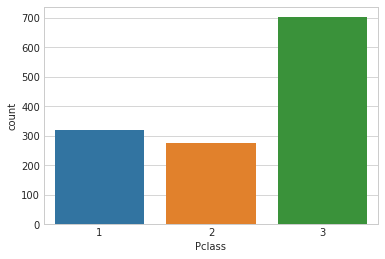

In [69]:
sns.countplot(x="Pclass",data=train_df)
plt.show()

In [70]:
train_df["Pclass"]=train_df["Pclass"].astype("category")
train_df=pd.get_dummies(train_df,columns=["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,title_0,title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,male,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,female,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,male,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id="27"></a><br>
## Sex

In [71]:
train_df["Sex"]=train_df["Sex"].astype("category")
train_df=pd.get_dummies(train_df,columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,title_0,title_1,title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id="28"></a><br>
## Drop Passenger ID and Cabin

In [72]:
train_df.drop(labels=["PassengerId","Cabin"],axis=1,inplace=True)
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'title_0', 'title_1',
       'title_2', 'title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

<a id="29"></a><br>
# Modeling

In [73]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id="30"></a><br>
## Train Test Split

In [74]:
train_df_len

881

In [75]:
test=train_df[train_df_len:]
test.drop(labels=["Survived"],axis=1,inplace=True)

In [76]:
test.head()

,Age,SibSp,Parch,Fare,title_0,title_1,title_2,title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
881,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [77]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


<a id="31"></a><br>
## Simple Logistic Regression

In [78]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
acc_log_train=round(logreg.score(X_train,y_train)*100,2)
acc_log_test=round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 83.22
Testing Accuracy: % 81.79


<a id="32"></a><br>
## Hyperparameter Tuning--Grid Search-- Cross Validation

We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [79]:
classifier = [DecisionTreeClassifier(random_state = 42),
             SVC(random_state = 42),
             RandomForestClassifier(random_state = 42),
             LogisticRegression(random_state = 42,solver='liblinear'),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [80]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7983050847457627
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.1min finished


0.840677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8220338983050846
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s


0.7796610169491525


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.7s finished


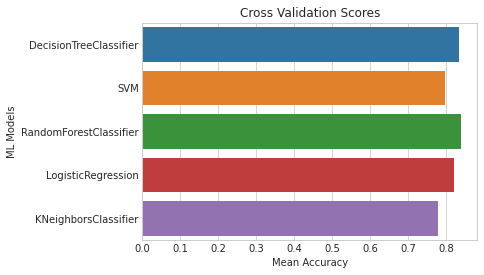

In [81]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

<a id="33"></a><br>
## Ensemble Modeling

In [82]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.8178694158075601


<a id="34"></a><br>
## Prediction and Submission

In [83]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_passengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)